In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import preprocessing # Used this normalizing technique but did not give good results

In [2]:
df = pd.read_excel('C:/Users/Jordan/Desktop/jupyter notebook/Correla/site2.xlsx')

In [3]:
df.head()

,Unnamed: 0,Site,Date,Vol,SiteNo
0,347,Site2,2019-04-02,3,1
1,348,Site2,2019-04-03,3,1
2,349,Site2,2019-04-04,3,1
3,350,Site2,2019-04-05,4,1
4,351,Site2,2019-04-06,3,1


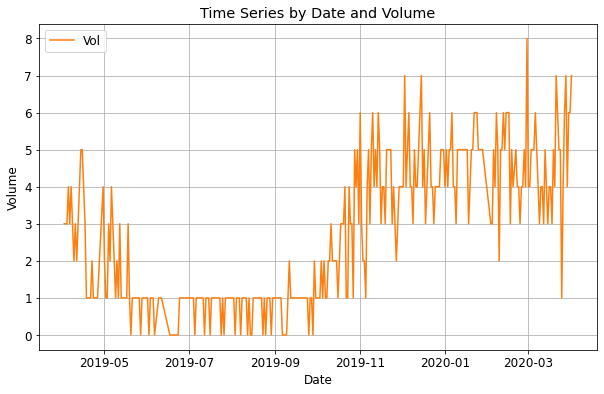

In [4]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.Date, df.Vol, color='tab:orange', label='Vol')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Time Series by Date and Volume')
ax.grid(True)
ax.legend(loc='upper left');

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']= df['Date'].map(dt.datetime.toordinal)

In [6]:
df.head()

,Unnamed: 0,Site,Date,Vol,SiteNo
0,347,Site2,737151,3,1
1,348,Site2,737152,3,1
2,349,Site2,737153,3,1
3,350,Site2,737154,4,1
4,351,Site2,737155,3,1


# Regression

In [7]:
# df['Date'] = np.log(df.Date+1)
# df['Vol'] = np.log(df.Vol+1)

In [8]:
X = df[['Date']]
y = df['Vol']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Building the LinearRegression Model
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)
predictions = LRModel.predict(X_test)

In [10]:
#Linear Regrression
accuracy = metrics.r2_score(y_test, predictions)*100
MAE = mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)

print('Accuracy (R-Square):', accuracy)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error:',MSE)

Accuracy (R-Square): 44.370711750883586
Mean Absolute Error: 1.1024227598394218
Mean Squared Error: 1.9147832002009884


In [11]:
print("Linear regression predictions for site 2:", predictions)

Linear regression predictions for site 2: [4.27376062 1.92882294 1.89017013 0.88519684 2.03189713 3.38474578
 2.74053214 4.10626507 4.96951135 0.6661642  2.00612858 3.25590306
 3.82281106 2.40554104 1.83863303 2.62457368 1.95459149 4.81490008
 3.88723243 0.40847874 4.13203361 1.05269239 2.53438377 1.96747576
 2.26381404 1.59383185 1.82574876 3.11417605 2.19939268 4.67317308
 2.67611077 0.84654402 1.77421167 4.69894162 1.43922057 0.35694165
 4.49279326 4.86643717 1.85151731 1.41345203 1.51652621 0.3311731
 2.44419386 3.34609297 0.93673393 4.68605735 4.29952916 4.42837189
 1.37479921 0.76923838 4.73759444 2.75341641 3.02398614 1.49075767
 1.18153512 2.94668051 1.07846093 4.90508999 4.94374281 0.92384966
 4.55721462 4.57009889 4.7118259  2.63745796 3.08840751 1.36191494
 1.40056775 0.51155292]


In [12]:
#Building the XGB model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)
xgb_pred = xg_boost.predict(X_test)

predictions = xg_boost.predict(X_test)

In [13]:
#XG Boost
accuracy = metrics.r2_score(y_test, xgb_pred)*100
MAE = mean_absolute_error(y_test,xgb_pred)
MSE = metrics.mean_squared_error(y_test, xgb_pred)

print('Accuracy (R2-score):', accuracy)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

Accuracy (R2-score): 56.04203366711212
Mean Absolute Error: 0.8603287724887624
Mean Squared Error : 1.5130514536207689


In [14]:
print("XG Boost predictions for site 2:", xgb_pred)

XG Boost predictions for site 2: [4.0081635  0.97073996 0.97073996 0.9897145  0.9738563  3.9979029
 1.0582068  5.925722   5.9912167  1.0738676  0.06358048 3.1651545
 4.9547877  0.99806017 0.97361374 1.8992214  0.97073996 4.949376
 4.017722   3.000709   5.925722   0.9832697  0.99806017 0.97073996
 0.98579276 0.9728719  0.97361374 3.1666627  0.14000818 5.899366
 1.0234088  0.9897145  0.97361374 4.091963   0.9627048  2.994039
 4.006369   4.999638   0.97361374 0.9627048  0.9728719  2.994039
 0.99806017 3.019726   0.98402363 5.899366   4.8376727  4.9892454
 0.9627048  2.0101533  4.9187417  2.7859282  5.7218657  0.24917814
 0.949847   3.0415368  0.9832697  4.0544434  4.0567675  0.12037164
 4.002156   7.889016   4.091963   1.0234088  3.888777   0.01223573
 0.9627048  1.0409744 ]
